# 01. Linear Regression

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('LinearRegressionData.csv')
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [3]:
X = dataset.iloc[:, :-1].values # independent variable

In [4]:
Y = dataset.iloc[:, -1].values # dependent variable

In [5]:
X, Y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100]))

In [6]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X, Y) # Creating a model

LinearRegression()

In [7]:
y_pred = reg.predict(X)
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

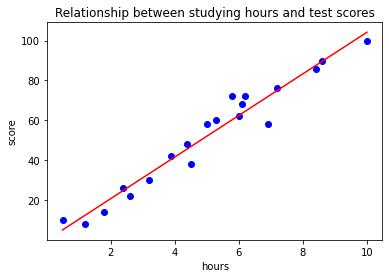

In [8]:
plt.scatter(X, Y, color='blue')
plt.plot(X, y_pred, color='red')
plt.title('Relationship between studying hours and test scores')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [9]:
print('What is the test score if you study 9 hours: ', reg.predict([[9]]))

What is the test score if you study 9 hours:  [93.77478776]


In [10]:
print('What are the test scores if you study 6, 7, and 8 hours: ', reg.predict([[6], [7], [8]]))

What are the test scores if you study 6, 7, and 8 hours:  [62.44369694 72.88739388 83.33109082]


In [11]:
a = reg.coef_ # Slope

In [12]:
b = reg.intercept_ # y-intercept

In [13]:
y = (a * 9) + b # Predicted value if a student studies 9 hours
y

array([93.77478776])

### Data Set Separation

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
dataset = pd.read_csv('LinearRegressionData.csv')
dataset

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22
5,3.2,30
6,3.9,42
7,4.4,48
8,4.5,38
9,5.0,58


In [16]:
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0) 
# Training set 80%
# Test set 20%

In [18]:
X, len(X)

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 20)

In [19]:
X_train, len(X_train) # # of training set

(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]),
 16)

In [20]:
X_test, len(X_test) # # of test set

(array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]),
 4)

In [21]:
Y, len(Y)

(array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100]),
 20)

In [22]:
Y_train, len(Y_train)

(array([60, 86, 42, 68, 22, 14, 30, 72, 58, 48, 76, 72, 26, 10, 58, 62]), 16)

In [23]:
Y_test, len(Y_test)

(array([ 90,   8, 100,  38]), 4)

### Modeling

In [24]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [25]:
reg.fit(X_train, Y_train)

LinearRegression()

### Visualization (training set)

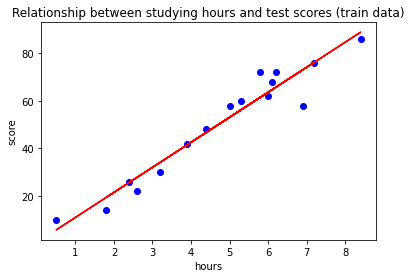

In [26]:
plt.scatter(X_train, Y_train, color='blue')
plt.plot(X_train, reg.predict(X_train), color='red')
plt.title('Relationship between studying hours and test scores (train data)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

### Visualization (test set)

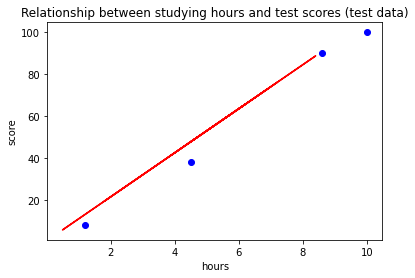

In [27]:
plt.scatter(X_test, Y_test, color='blue')
plt.plot(X_train, reg.predict(X_train), color='red')
plt.title('Relationship between studying hours and test scores (test data)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [28]:
m = reg.coef_
m

array([10.49161294])

In [29]:
c = reg.intercept_
c

0.6115562905169796

### Evaluation

In [30]:
reg.score(X_test, Y_test) # evaluating test set

0.9727616474310156

In [31]:
reg.score(X_train, Y_train) # evaluating training set

0.9356663661221668

## Gradient Descent

max_iter : # of iteration for training set a.k.a Epoch number  
eta0 : learning rate

In [32]:
from sklearn.linear_model import SGDRegressor # Stochastic Gradient Descent
# sr = SGDRegressor(max_iter=100, eta0=1e-4, random_state=0, verbose=1)
# sr = SGDRegressor(max_iter=200, eta0=1e-4, random_state=0, verbose=1)
# sr = SGDRegressor(max_iter=300, eta0=1e-4, random_state=0, verbose=1)
sr = SGDRegressor(max_iter=1000, eta0=1e-4, random_state=0, verbose=1)
# 0.001 = 1e-3 (10^-3)
# 1000 = 1e+3 (10^3)
sr.fit(X_train, Y_train)

-- Epoch 1
Norm: 0.27, NNZs: 1, Bias: 0.048869, T: 16, Avg. loss: 1484.241876
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.47, NNZs: 1, Bias: 0.083896, T: 32, Avg. loss: 1419.741822
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.64, NNZs: 1, Bias: 0.114272, T: 48, Avg. loss: 1367.983092
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.79, NNZs: 1, Bias: 0.141552, T: 64, Avg. loss: 1322.870279
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.94, NNZs: 1, Bias: 0.166772, T: 80, Avg. loss: 1282.550224
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1.07, NNZs: 1, Bias: 0.190476, T: 96, Avg. loss: 1245.587071
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 1.20, NNZs: 1, Bias: 0.212877, T: 112, Avg. loss: 1211.227118
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 1.32, NNZs: 1, Bias: 0.234194, T: 128, Avg. loss: 1179.037565
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 1.43, NNZs: 1, Bias: 0.254556, T: 144, Avg. loss: 1148.814106
Total training 

Total training time: 0.25 seconds.
-- Epoch 584
Norm: 9.97, NNZs: 1, Bias: 1.745591, T: 9344, Avg. loss: 18.301169
Total training time: 0.25 seconds.
-- Epoch 585
Norm: 9.97, NNZs: 1, Bias: 1.745807, T: 9360, Avg. loss: 18.288859
Total training time: 0.25 seconds.
-- Epoch 586
Norm: 9.97, NNZs: 1, Bias: 1.746021, T: 9376, Avg. loss: 18.276678
Total training time: 0.25 seconds.
-- Epoch 587
Norm: 9.98, NNZs: 1, Bias: 1.746235, T: 9392, Avg. loss: 18.264571
Total training time: 0.25 seconds.
-- Epoch 588
Norm: 9.98, NNZs: 1, Bias: 1.746446, T: 9408, Avg. loss: 18.252599
Total training time: 0.25 seconds.
-- Epoch 589
Norm: 9.98, NNZs: 1, Bias: 1.746657, T: 9424, Avg. loss: 18.240745
Total training time: 0.25 seconds.
-- Epoch 590
Norm: 9.98, NNZs: 1, Bias: 1.746867, T: 9440, Avg. loss: 18.229006
Total training time: 0.25 seconds.
-- Epoch 591
Norm: 9.98, NNZs: 1, Bias: 1.747075, T: 9456, Avg. loss: 18.217358
Total training time: 0.25 seconds.
-- Epoch 592
Norm: 9.98, NNZs: 1, Bias: 1.747

SGDRegressor(eta0=0.0001, random_state=0, verbose=1)

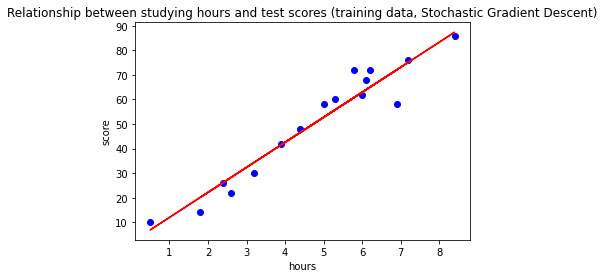

In [33]:
plt.scatter(X_train, Y_train, color='blue')
plt.plot(X_train, sr.predict(X_train), color='red')
plt.title('Relationship between studying hours and test scores (training data, Stochastic Gradient Descent)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [34]:
sr.coef_, sr.intercept_

(array([10.19197471]), array([1.77603038]))

In [35]:
sr.score(X_test, Y_test)

0.9748430825252619

In [36]:
sr.score(X_train, Y_train)

0.9347804758954794